## Observations and Insights 

Analysis:

1) From the boxplot it can be seen that the Capomulin and Ceftamin drugs had the lowest variability in tumor volume median. The IQR for both of these drugs was lower than that of the other two drugs and furthermore, the upperbound of the wiskers for these drugs were lower or about the same as the lower bounds of the other two top 4 drugs. From the boxplots, it appears that Capomulin and Ceftamin are the most promising at reducing the tumor size, though confidence intervals for all the drugs would need to be calculated to see if further investigation into which drug is most effective is necessary.

2) Infubinol has a lower bound outlier. This is the only drug of the top four drugs plotted that concains an outlier. Further testing could be done to discover exactly which mouse represents this particular outlier and what is different about this mouse that makes it fall as an outlier. 

3) The r-squared value of the linear regression model is 0.708 or 70.8% and the r-value is 0.84 or 84%. The regression model appears to capture the majority of the variance. A large part of the variance seems to be attributable to the differences in drug regimens.

In [21]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from sklearn import datasets

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset and display the data table for preview
combined_mousestudy_df = pd.merge(mouse_metadata, study_results,
                                 how='left', on='Mouse ID')

# sorting by mouse id and remove values that are duplicated
combined_mousestudy_df.sort_values(["Mouse ID", "Timepoint"], inplace = True) 

combined_mousestudy_df.loc[combined_mousestudy_df.duplicated(subset = ["Mouse ID", "Timepoint"]), "Mouse ID"]

combined_mousestudy_df = combined_mousestudy_df.loc[combined_mousestudy_df["Mouse ID"] != "g989", :]

combined_mousestudy_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1


## Summary Statistics

In [2]:
# Summary statistics table 
# mean, median, variance, standard deviation, and SEM (standard error of the mean) of the tumor volume for each regimen


tumor_volume_avg = combined_mousestudy_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"].rename("Mean")
tumor_volume_median = combined_mousestudy_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"].rename("Median")
tumor_volume_variance = combined_mousestudy_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"].rename("Variance")
tumor_volume_standev = combined_mousestudy_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"].rename("Standard Deviation")
tumor_volume_sem = combined_mousestudy_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"].rename("Standard Error of Mean")

Summary_tumor_volume = pd.DataFrame({'Avg Tumor Vol': tumor_volume_avg, 'Mediam Tumor Vol': tumor_volume_median, 
                                     'Tumor Vol Variance': tumor_volume_variance, 'Tumor Vol Standard Deviation': tumor_volume_standev, 
                                     'Tumor Vol Standard Error of Mean': tumor_volume_sem})

Summary_tumor_volume.head()

,Avg Tumor Vol,Mediam Tumor Vol,Tumor Vol Variance,Tumor Vol Standard Deviation,Tumor Vol Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice')

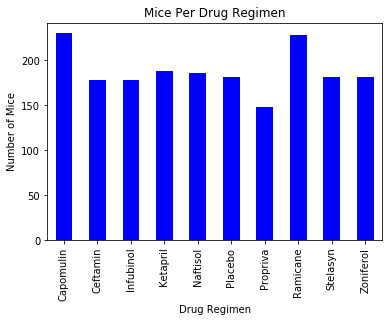

In [3]:
# Grouping mice by drug regimen 
mice_by_treatment = combined_mousestudy_df.groupby("Drug Regimen")

# Count how many number of mice in each regimen
count_mice_by_treatment = mice_by_treatment["Drug Regimen"].count()

# Bar plot displaying number of mice per drug regimen by pandas method

count_chart = count_mice_by_treatment.plot(kind='bar', color="b")

# Set the xlabel and ylabel 
plt.title("Mice Per Drug Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Mice")

In [4]:
# Get the number of mice per treatment to make an array for pyplot method
count_mice_by_treatment

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Mice')

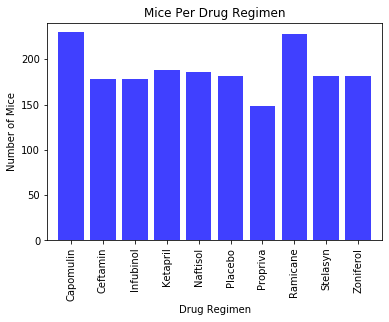

In [5]:
# Bar plot displaying number of mice per drug regimen by pyplot method

#Create the array with the numbers of mice per treatment
treatment_numbers = [230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

#Set the x_axis to be the amount of mice per treatment
x_axis = np.arange(len(count_mice_by_treatment))

plt.bar(x_axis, treatment_numbers, color='b', alpha=0.75, align='center')

# create the tick locations
tick_locations = [i for i in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 
        'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 
        'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

#set the limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(treatment_numbers)+10)

#set the labels 
plt.title("Mice Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")


Text(0, 0.5, '')

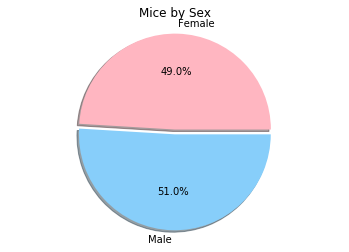

In [6]:
# Grouping mice by drug regimen 
mice_by_sex = combined_mousestudy_df.groupby("Sex")

# Count how many number of mice in each regimen
count_mice_by_sex = mice_by_sex["Sex"].count()

# pie chart displaying the distribution of female versus male mice using pandas
colors = ["lightpink", "lightskyblue"]
explode = (0, 0.05)
mice_by_sex_chart = count_mice_by_sex.plot(kind='pie', autopct="%1.1f%%", shadow=True, startangle=0, colors=colors , explode=explode) 
plt.title("Mice by Sex")
plt.axis("equal")
plt.ylabel(None)


(-1.108129183272889, 1.1003871039653756, -1.1565962693631673, 1.11041028884618)

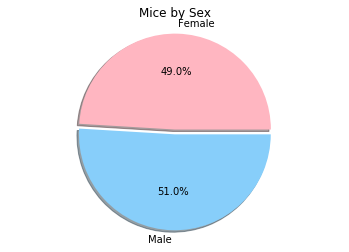

In [7]:
# pie chart displaying the distribution of female versus male mice using pyplot

sex = combined_mousestudy_df["Sex"].unique()
percent_sex = count_mice_by_sex
colors = ["lightpink", "lightskyblue"]
explode = (0, 0.05)

plt.pie(percent_sex, explode=explode, labels=sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=0)

plt.title("Mice by Sex")
plt.axis("equal")

## Quartiles, Outliers and Boxplots

Text(0.5, 0, 'Drug Regimen')

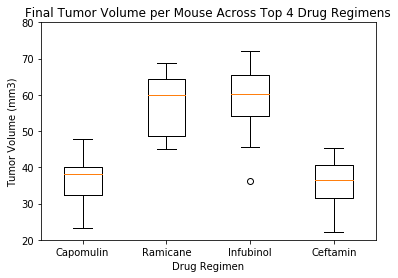

In [26]:
# Grab the top 4 regimens (Capomulin, Ramicane, Infubinol, and Ceftamin)

combined_df = combined_mousestudy_df
drug_list =['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

top_reg = combined_df[combined_df["Drug Regimen"].isin(drug_list)]
top_reg = top_reg.sort_values(["Timepoint"])
top_reg

top_reg_dat = top_reg[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
top_reg_dat

#Group the data by both Drug Regimen and Mouse ID and get the final tumor measurement
top_reg_sort = top_reg_dat.groupby(['Drug Regimen', 'Mouse ID']).last()['Tumor Volume (mm3)']
top_reg_sort.head()

# put above data into dataframe for future manipulation
top_reg_df = top_reg_sort.to_frame()
top_reg_df

#reset the index for final 4 drugs of interest
tumor_drugs_df = top_reg_df.reset_index()

# Create a tumor drug regimen list with tumor volume for plotting
final_drug_list = tumor_drugs_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
final_drug_list

#Turn the list into a dataframe for manipulation
final_drugs_df = pd.DataFrame(final_drug_list)

# Generate a box plot of the final tumor volume of each mouse across the top four drug regimens
tumor_volumes = [volume for volume in final_drugs_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volumes, labels=drug_list)
plt.ylim(20, 80)
plt.title("Final Tumor Volume per Mouse Across Top 4 Drug Regimens")
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')


## Line and Scatter Plots

In [9]:
# Randomly selected a mouse and grab data for that particular mouse, the mouse chosen: m601

time_point_vs_tumor_vol = combined_df[combined_df["Mouse ID"].isin(["m601"])]
time_point_vs_tumor_vol

#Create new data frame for mouse ID m601 with ID, timepoint and tumor volume

time_point_vs_tumor_vol_df = time_point_vs_tumor_vol[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
time_point_vs_tumor_vol_df

# Establish line plot data frame, resetting the index
line_plot = time_point_vs_tumor_vol_df.reset_index()
line_plot

,index,Mouse ID,Timepoint,Tumor Volume (mm3)
0,30,m601,0,45.000000
1,31,m601,5,41.408591
2,32,m601,10,36.825367
3,33,m601,15,35.464612
4,34,m601,20,34.255732
5,35,m601,25,33.118756
6,36,m601,30,31.758275
7,37,m601,35,30.834357
8,38,m601,40,31.378045
9,39,m601,45,28.430964


Text(0, 0.5, 'Tumor Volume (mm3)')

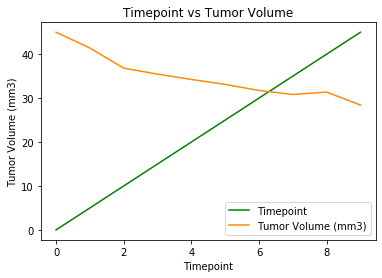

In [14]:
# Remove index for graphing of the line plot with final dataframe
final_line_plot = line_plot[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
final_line_plot

# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
color = ["green", "darkorange"]
lines_df = final_line_plot.plot.line(color = color)
plt.title("Timepoint vs Tumor Volume")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

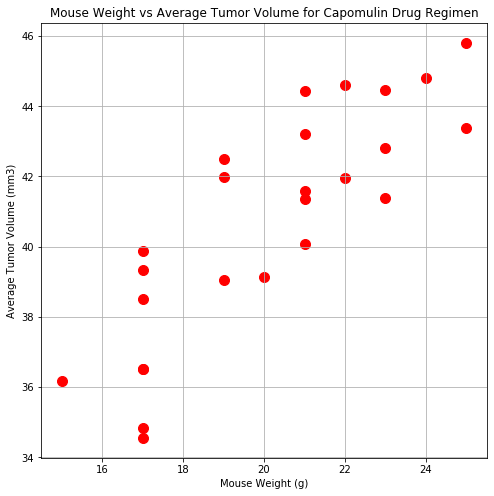

In [11]:
# Create a dataframe to retrieve data for the specific drug regimen 'Capomulin' using pandas method
Capomulin_df = combined_df[combined_df["Drug Regimen"].isin(["Capomulin"])]
Capomulin_df

Capomulin_Scatter_plot = Capomulin_df.reset_index()
Capomulin_Scatter_plot

Capomulin_weight = Capomulin_Scatter_plot.groupby(['Mouse ID', 'Weight (g)', 'Tumor Volume (mm3)']).mean()
Capomulin_weight

Capomulin_weight_volume_plot = pd.DataFrame(Capomulin_weight).reset_index()
Capomulin_weight_volume_plot

# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_scatter_final = Capomulin_weight_volume_plot.groupby('Mouse ID').mean()
Capomulin_scatter_final

Capomulin_scatter_final.plot(kind='scatter', x='Weight (g)', 
             y='Tumor Volume (mm3)', grid = True, figsize= (8,8), c='red', s=100)

plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Drug Regimen")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


Text(0, 0.5, 'Average Tumor Volume (mm3)')

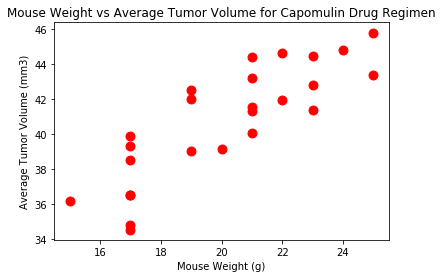

In [12]:
# Create a dataframe to retrieve data for the specific drug regimen 'Capomulin' using pyplot method

# Get the data for the specific drug and calculate the average
Capomulin_data = combined_mousestudy_df.loc[combined_mousestudy_df["Drug Regimen"]=="Capomulin"]
average = Capomulin_data.groupby(['Mouse ID']).mean()

# plot the data
plt.scatter(average["Weight (g)"], average["Tumor Volume (mm3)"], c='red', s=80)
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Drug Regimen")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')


## Correlation and Regression

The r-value is: 0.8419363424694726
The r-squared is: 0.708856804770873


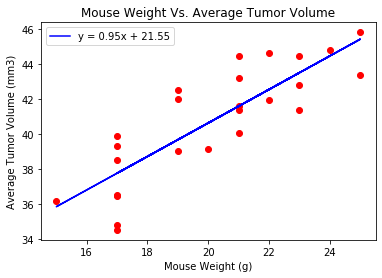

In [18]:
# Add the linear regression equation and line to plot
x_values = Capomulin_scatter_final["Weight (g)"]
y_values = Capomulin_scatter_final["Tumor Volume (mm3)"]
 
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.scatter(x_values,y_values, color = 'red')

plt.plot(x_values,regress_values,"r-",color = "blue", label = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))
plt.legend(loc="upper left")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title("Mouse Weight Vs. Average Tumor Volume")

print(f"The r-value is: {rvalue}")
print(f"The r-squared is: {rvalue**2}")
plt.show()
